# Check the input images

I here want to investigate the input files to check which patches they overlap and what other relevant files are reuired.

The first run on exposures was tried without performing dark or flat correction. We hope that these might allow the removal of the large negative pixel values.

In [215]:
from astropy.io import fits
from astropy.wcs import WCS
import glob
import numpy as np

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

In [35]:
inputs = []
minimal_stacks = open('minimal_stacks.lis', 'r')
for line in minimal_stacks.readlines():
    #print(line.strip())
    inputs.append(line.strip())
    
    
inputs_exposures = []
minimal_exposures = open('minimal_exposures.lis', 'r')
for line in minimal_exposures.readlines():
    #print(line.strip())
    inputs_exposures.append(line.strip())

In [12]:
DATA_LOC = '/Volumes/Raph500/lsst-ir-fusion'

In [7]:
inputs[0]

'../../dmu0/dmu0_VISTA/dmu0_VIDEO/data/20120924/v20120924_00582_st.fit'

In [10]:
inputs[0][5:]

'/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20120924/v20120924_00582_st.fit'

In [43]:
f = fits.open(DATA_LOC + inputs[0][5:])

In [44]:
f[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'ESO     '                    / European Southern Observatory         
DATE    = '2012-09-25T08:05:25'         / Date this file was written            
TELESCOP= 'VISTA   '                    / ESO Telescope Name                    
INSTRUME= 'VIRCAM  '                    / Instrument used.                      
OBJECT  = 'No name '           / Original target.                               
RA      =            34.539904          / 02:18:09.5 RA (J2000) pointing (deg)  
DEC     =             -4.992

In [16]:
f[1].header

XTENSION= 'IMAGE   '           / binary table extension                         
BITPIX  =                   32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 2091 / length of original image axis                  
NAXIS2  =                 2155 / length of original image axis                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
EXTNAME = 'DET1.CHIP1'         / Extension name                                 
ORIGIN  = 'ESO     ' / European Southern Observatory                            
DATE    = '2012-09-25T08:06:20.3315' / Date the file was written                
EXPTIME =           50.0000000 / Integration time                               
MJD-OBS =       56195.33711304 / Obs start 2012-09-25T08:05:26.567              
DATE-OBS= '2012-09-25T08:05:

In [45]:
f = fits.open(DATA_LOC + inputs_exposures[0][5:])

In [46]:
f[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'ESO     '                    / European Southern Observatory         
DATE    = '2012-09-25T08:05:25'         / Date this file was written            
TELESCOP= 'VISTA   '                    / ESO Telescope Name                    
INSTRUME= 'VIRCAM  '                    / Instrument used.                      
OBJECT  = 'No name '           / Original target.                               
RA      =            34.539904          / 02:18:09.5 RA (J2000) pointing (deg)  
DEC     =             -4.992

In [47]:
f[1].header

XTENSION= 'IMAGE   '           / binary table extension                         
BITPIX  =                   32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 2048 / length of original image axis                  
NAXIS2  =                 2048 / length of original image axis                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
EXTNAME = 'DET1.CHIP1'         / Extension name                                 
ORIGIN  = 'ESO     ' / European Southern Observatory                            
DATE    = '2012-09-25T08:06:20.3315' / Date the file was written                
EXPTIME =           50.0000000 / Integration time                               
MJD-OBS =       56195.33711304 / Obs start 2012-09-25T08:05:26.567              
DATE-OBS= '2012-09-25T08:05:

In [53]:
flats = []
darks = []
conf = []
lincor = []
for f in inputs:
    header = fits.open(DATA_LOC + f[5:])[1].header
    flats.append(header['FLATCOR'].split('[')[0])
    darks.append(header['DARKCOR'].split('[')[0])
    conf.append(header['CIR_CPM'].split('[')[0])
    lincor.append(header['LINCOR'].split('[')[0])
set(flats) , set(darks), set(lincor)

({'H_flat_20121003.fit',
  'J_flat_20121003.fit',
  'Ks_flat_20121031.fit',
  'Y_flat_20171006.fit',
  'Z_flat_20120829.fit'},
 {'dark_20120924_50_1.fit',
  'dark_20121021_10_6.fit',
  'dark_20121021_30_2.fit',
  'dark_20121122_10_6.fit',
  'dark_20171027_30_2.fit'},
 {'chan_comb_20120827.fit',
  'chan_comb_20120923.fit',
  'chan_comb_20121026.fit',
  'chan_comb_20171021.fit'})

In [52]:
flats_exposures = []
darks_exposures = []
conf_exposures = []
lincor_exposures = []
for f in inputs_exposures:
    header = fits.open(DATA_LOC + f[5:])[1].header
    flats_exposures.append(header['FLATCOR'].split('[')[0])
    darks_exposures.append(header['DARKCOR'].split('[')[0])
    conf_exposures.append(header['CIR_CPM'].split('[')[0])
    lincor_exposures.append(header['LINCOR'].split('[')[0])
set(flats_exposures) ,set(darks_exposures),set(conf_exposures),set(lincor_exposures)

({'H_flat_20121003.fit',
  'J_flat_20121003.fit',
  'Ks_flat_20121031.fit',
  'Y_flat_20171006.fit',
  'Z_flat_20120829.fit'},
 {'dark_20120924_50_1.fit',
  'dark_20121021_10_6.fit',
  'dark_20121021_30_2.fit',
  'dark_20121122_10_6.fit',
  'dark_20171027_30_2.fit'},
 {'H_conf_20121003.fit',
  'J_conf_20121003.fit',
  'Ks_conf_20121031.fit',
  'Y_conf_20171006.fit',
  'Z_conf_20120829.fit'},
 {'chan_comb_20120827.fit',
  'chan_comb_20120923.fit',
  'chan_comb_20121026.fit',
  'chan_comb_20171021.fit'})

# Patches



In [58]:
#We are using a rings skymap
from lsst.geom import SpherePoint 
from lsst.geom import degrees
from lsst.skymap.ringsSkyMap import RingsSkyMap, RingsSkyMapConfig

#Following taken from dmu1/2_Survey_comparisons.ipynb test choice
coord = SpherePoint(35.429025*degrees,-4.90853*degrees)
config = RingsSkyMapConfig()
#These config options are chose to be the same as HSC:
#https://github.com/lsst/obs_subaru/blob/master/config/hsc/makeSkyMap.py
#and copied for obs_vista
#https://github.com/lsst-uk/obs_vista/blob/master/config/makeSkyMap.py
config.numRings = 120
config.projection = "TAN"
config.tractOverlap = 1.0/60 # Overlap between tracts (degrees)
config.pixelScale = 0.168
sm = RingsSkyMap(config)
sm.findTract(coord)

TractInfo(id=8524, ctrCoord=[0.8087076683756161, 0.5811684769959703, -0.09074749834931431])

In [62]:
sxds_tracts = [8282,8283,8284,8523,8524,8525,8765,8766,8767] 

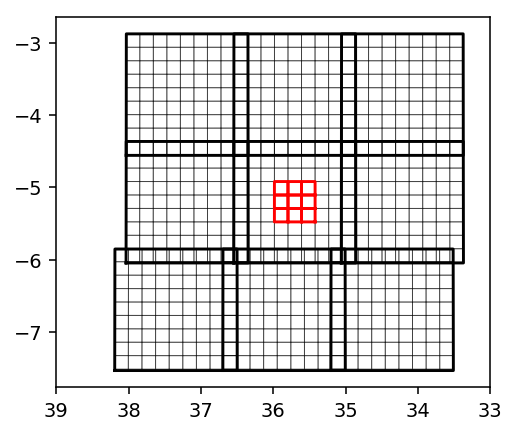

In [205]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=140)
for tract in sxds_tracts:
    vertices = sm.generateTract(tract).getVertexList()
    ra = [vertices[n][0].asDegrees() for n in np.mod(np.arange(5),4)]
    dec = [vertices[n][1].asDegrees() for n in np.mod(np.arange(5),4)]
    ax.plot(ra, dec, c = 'k')
    for p in np.nditer(np.meshgrid(np.arange(0,9), np.arange(0,9))):
        #print(p[0], p[1])
        t = sm.generateTract(tract)
        vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
        ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
        #print(tract, ra)
        dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
        ax.plot(ra, dec, c = 'k', alpha=0.5, linewidth=0.5)

#Plot the 9 test patches
for p in np.nditer(np.meshgrid(np.arange(3,6), np.arange(3,6))):
    #print(p[0], p[1])
    t = sm.generateTract(8524)
    vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
    ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
    #print(tract, ra)
    dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
    ax.plot(ra, dec, c = 'r')
    
ax.axis('scaled')
ax.set_xlim([39, 33])
ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination[deg]')
fig.savefig('./figs/sxds_tracts_patches_tiles.pdf', overwrite=True)
fig.savefig('./figs/sxds_tracts_patches_tiles.png', overwrite=True)

In [223]:
tiles = glob.glob(DATA_LOC + '/dmu0/dmu0_VISTA/dmu0_VIDEO/data/*/*_tl.fit')

In [224]:
fits.open(tiles[0])[1].header

SIMPLE  =                    T                                                  
BITPIX  =                   32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                12791 / length of original image axis                  
NAXIS2  =                15678 / length of original image axis                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
ORIGIN  = 'ESO     '                    / European Southern Observatory         
DATE    = '2017-10-28T02:03:30'         / Date this file was written            
TELESCOP= 'VISTA   '                    / ESO Telescope Name                    
INSTRUME= 'VIRCAM  '                    / Instrument used.                      
OBJECT  = 'No name '        

In [222]:
tiles

[]

In [225]:
hdu = fits.open(tiles[0])
wcs = WCS(hdu[1].header)
ra, dec = wcs.all_pix2world([0,0,hdu[1].header['NAXIS1'],hdu[1].header['NAXIS1']], 
                            [0,hdu[1].header['NAXIS2'],0,hdu[1].header['NAXIS2']], 1) 

In [232]:
ra

array([36.12910792, 36.13331367, 34.91341939, 34.91496235])

-4.0722693022398575

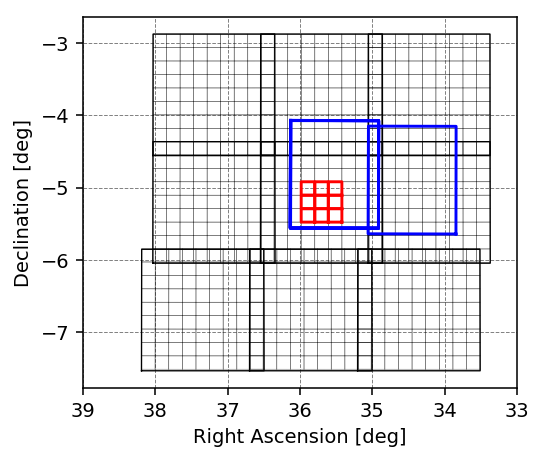

In [250]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=140)
for tract in sxds_tracts:
    vertices = sm.generateTract(tract).getVertexList()
    ra = [vertices[n][0].asDegrees() for n in np.mod(np.arange(5),4)]
    dec = [vertices[n][1].asDegrees() for n in np.mod(np.arange(5),4)]
    ax.plot(ra, dec, c = 'k', linewidth=0.7)
    for p in np.nditer(np.meshgrid(np.arange(0,9), np.arange(0,9))):
        #print(p[0], p[1])
        t = sm.generateTract(tract)
        vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
        ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
        #print(tract, ra)
        dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
        ax.plot(ra, dec, c = 'k', alpha=0.5, linewidth=0.3)

#Plot the 9 test patches
for p in np.nditer(np.meshgrid(np.arange(3,6), np.arange(3,6))):
    #print(p[0], p[1])
    t = sm.generateTract(8524)
    vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
    ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
    #print(tract, ra)
    dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
    ax.plot(ra, dec, c = 'r')
    
    
for t in tiles:
    hdu = fits.open(t)
    wcs = WCS(hdu[1].header)
    ra, dec = wcs.all_pix2world([0,0,hdu[1].header['NAXIS1'],hdu[1].header['NAXIS1']], 
                            [0,hdu[1].header['NAXIS2'],0,hdu[1].header['NAXIS2']], 1) 
    c = [0,1,3,2,0]
    ax.plot([ra[n] for n in c],[dec[n] for n in c], c='b')

ax.axis('scaled')
ax.set_xlim([39, 33])
ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]')

plt.grid(linestyle="--", color='black', linewidth=0.5, alpha=0.5)

fig.savefig('./figs/sxds_tracts_patches_tiles.pdf', overwrite=True)
fig.savefig('./figs/sxds_tracts_patches_tiles.png', overwrite=True)
